/home/david/.local/lib/python3.8/site-packages/skimage/io/manage_plugins.py:23: UserWarning: Your installed pillow version is < 7.1.0. Several security issues (CVE-2020-11538, CVE-2020-10379, CVE-2020-10994, CVE-2020-10177) have been fixed in pillow 7.1.0 or higher. We recommend to upgrade this library.
  from .collection import imread_collection_wrapper


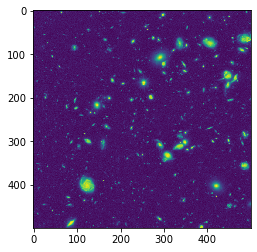

In [4]:
from math import sqrt
from skimage import data
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray

import matplotlib.pyplot as plt
import numpy as np
#import tensorflow as tf
#import cv2
from skimage.filters import gaussian


image = data.hubble_deep_field()[0:500, 0:500]
image_gray = rgb2gray(image)

plt.imshow(image_gray)
plt.show()

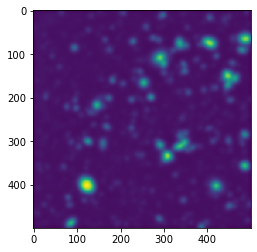

In [6]:
fig, figsize=(9, 3)
gaussian_using_skimage = gaussian(image_gray, sigma=5, mode='constant', cval=0.0)
plt.imshow(gaussian_using_skimage)
plt.show()

In [7]:
gradiente = np.gradient(gaussian_using_skimage)
eivalues, eivectors = np.linalg.eig(gradiente)

In [8]:
print(eivectors.real)

[[[-0.01390335 -0.01390335  0.0106969  ... -0.01167647 -0.00646424
   -0.01906407]
  [-0.01434354 -0.01434354  0.01361121 ...  0.02906246  0.05490405
    0.09086923]
  [-0.01527168 -0.01527168  0.01979007 ... -0.04024732 -0.10490627
   -0.14710338]
  ...
  [ 0.00655332  0.00655332  0.04371315 ... -0.03971593  0.04844399
    0.04748946]
  [-0.01484961 -0.01484961  0.03927545 ...  0.0644815  -0.13432264
   -0.1285928 ]
  [-0.0250327  -0.0250327   0.03660374 ... -0.02989345  0.05913399
    0.05271351]]

 [[-0.0055854  -0.0055854   0.00518796 ... -0.02846562 -0.0223724
   -0.02172226]
  [-0.00749879 -0.00749879  0.00606217 ...  0.05270884  0.04470745
    0.04408559]
  [-0.00977732 -0.00977732  0.00699682 ... -0.04099905 -0.04458194
   -0.04623501]
  ...
  [ 0.01973082  0.01973082 -0.04613057 ...  0.05259433  0.04519707
    0.04498363]
  [ 0.01528049  0.01528049 -0.04515132 ... -0.04812119 -0.04511692
   -0.04621119]
  [ 0.01136758  0.01136758 -0.04246322 ...  0.02270268  0.02253658
    0.0

In [ ]:
from math import sqrt
from skimage import data
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray

import matplotlib.pyplot as plt


image = data.hubble_deep_field()[0:500, 0:500]
image_gray = rgb2gray(image)

blobs_log = blob_log(image_gray, max_sigma=30, num_sigma=10, threshold=.1)

# Compute radii in the 3rd column.
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)

blobs_dog = blob_dog(image_gray, max_sigma=30, threshold=.1)
blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)

blobs_doh = blob_doh(image_gray, max_sigma=30, threshold=.01)

blobs_list = [blobs_log, blobs_dog, blobs_doh]
colors = ['yellow', 'lime', 'red']
titles = ['Laplacian of Gaussian', 'Difference of Gaussian',
          'Determinant of Hessian']
sequence = zip(blobs_list, colors, titles)

fig, axes = plt.subplots(1, 3, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()

for idx, (blobs, color, title) in enumerate(sequence):
    ax[idx].set_title(title)
    ax[idx].imshow(image)
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
        ax[idx].add_patch(c)
    ax[idx].set_axis_off()

plt.tight_layout()
plt.show()

In [ ]:
print(blobs_log)